In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dados Históricos - Ibovespa.csv')

In [3]:
df.head()

Data   Último  Abertura   Máxima   Mínima    Vol.    Var%
0  07.08.2023  119.380   119.509  120.104  118.894   8,73M  -0,11%
1  04.08.2023  119.508   120.586  121.442  119.215  15,07M  -0,89%
2  03.08.2023  120.586   120.859  122.619  120.365  13,03M  -0,23%
3  02.08.2023  120.859   121.249  121.252  119.798  10,57M  -0,32%
4  01.08.2023  121.248   121.945  121.945  120.154  10,30M  -0,57%

In [4]:
df.shape

(4999, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4999 non-null   object 
 1   Último    4999 non-null   float64
 2   Abertura  4999 non-null   float64
 3   Máxima    4999 non-null   float64
 4   Mínima    4999 non-null   float64
 5   Vol.      4998 non-null   object 
 6   Var%      4999 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.5+ KB


In [6]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [7]:
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df = df[['Data', 'Último']]
df.columns = ['ds', 'y']
df = df.set_index('ds')

In [8]:
df.head()

y
ds                 
2023-08-07  119.380
2023-08-04  119.508
2023-08-03  120.586
2023-08-02  120.859
2023-08-01  121.248

<Axes: xlabel='ds', ylabel='y'>

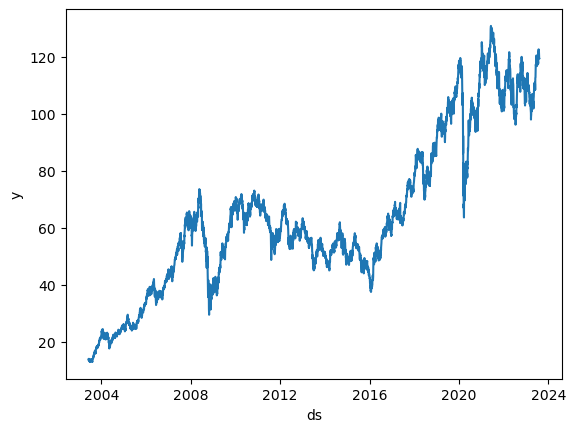

In [9]:
sns.lineplot(data=df, x='ds', y='y')

<Axes: xlabel='ds', ylabel='y'>

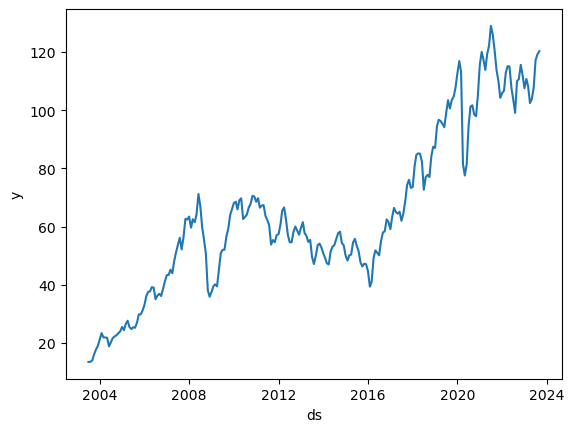

In [10]:
sns.lineplot(data=df.resample('1M').apply(np.mean), x='ds', y='y')

<Axes: xlabel='y'>

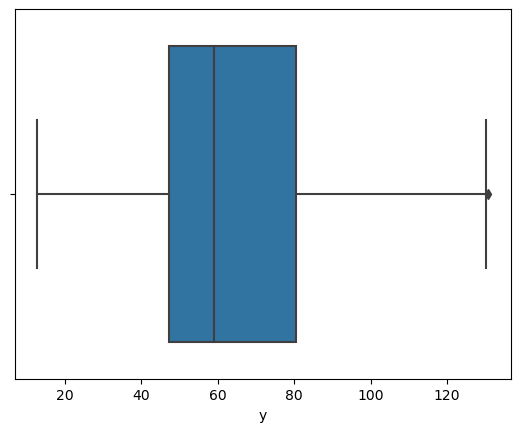

In [11]:
sns.boxplot(data=df, x='y')

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [13]:
resultados = seasonal_decompose(df, period=247)

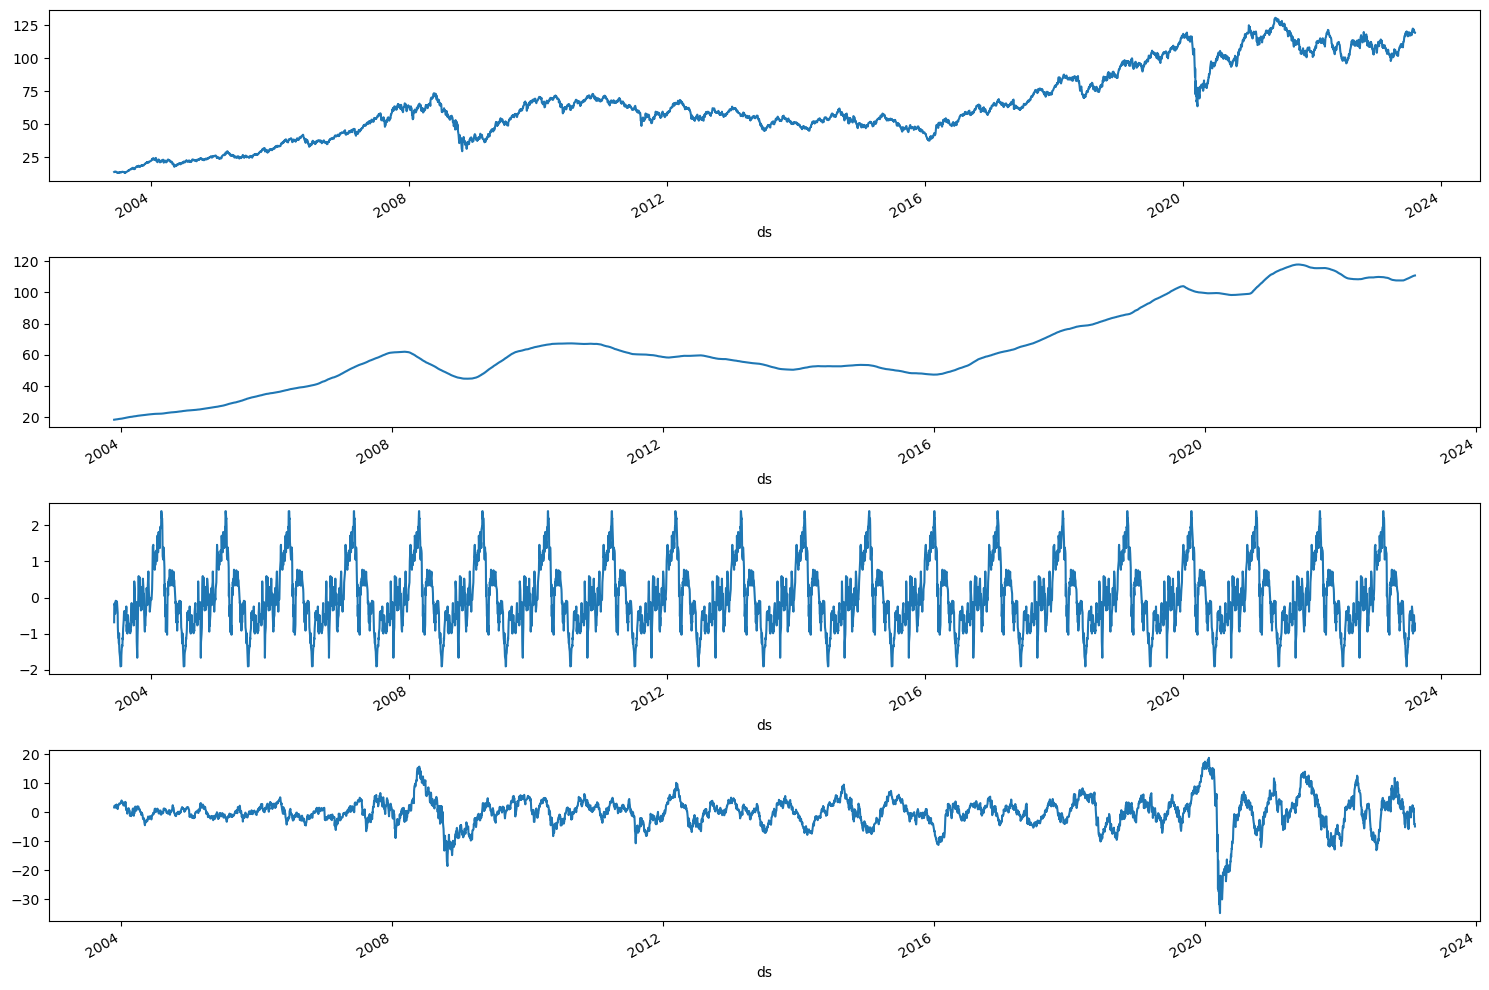

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=axes[0])
resultados.trend.plot(ax=axes[1])
resultados.seasonal.plot(ax=axes[2])
resultados.resid.plot(ax=axes[3])

plt.tight_layout()

In [15]:
result = adfuller(df.y.values)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'P-value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -1.5725493024157278
P-value: 0.49736654991025914
Valores críticos:
	1%: -3.431661944885779
	5%: -2.8621197374408225
	10%: -2.5670785949998973


In [16]:
# Não estacionária, pois P-value > 0.05

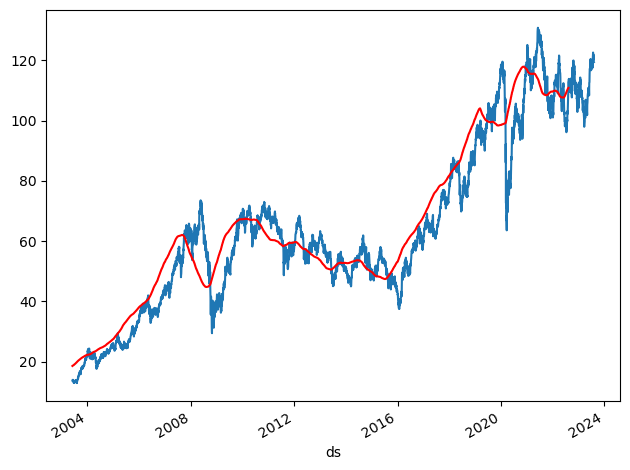

In [17]:
ma = df.rolling(247).mean()
f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

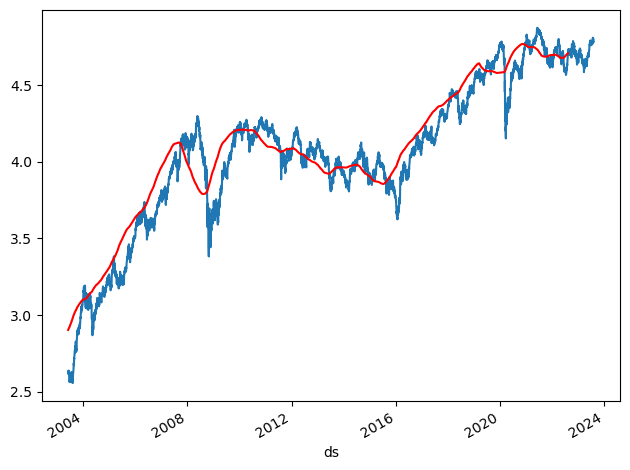

In [18]:
df_log = np.log(df)
ma_log = df_log.rolling(247).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

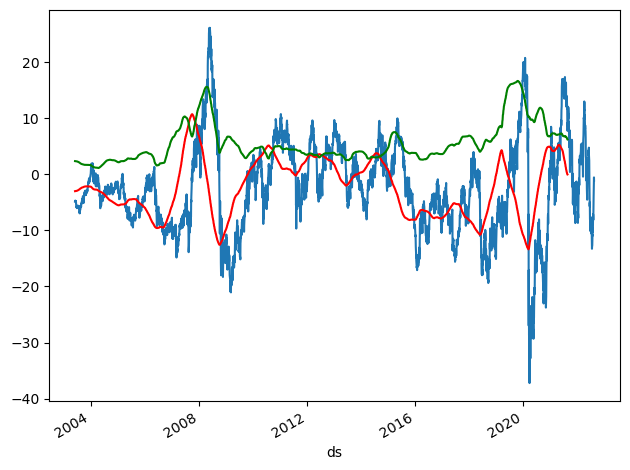

In [19]:
df_s = (df - ma).dropna()

ma_s = df_s.rolling(247).mean()

std = df_s.rolling(247).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, color='r', legend=False)
std.plot(ax=ax, color='g', legend=False)
plt.tight_layout()

In [20]:
X_s = df_s.y.values

result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste estatístico: {result_s[0]}')
print(f'P-value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -5.283312439775281
P-value: 5.9287295916986e-06
Valores críticos:
	1%: -3.431735318157509
	5%: -2.8621521529237954
	10%: -2.5670958511008046


Teste ADF
Teste estatístico: -19.486802849679602
P-value: 0.0
Valores críticos:
	1%: -3.431661944885779
	5%: -2.8621197374408225
	10%: -2.5670785949998973


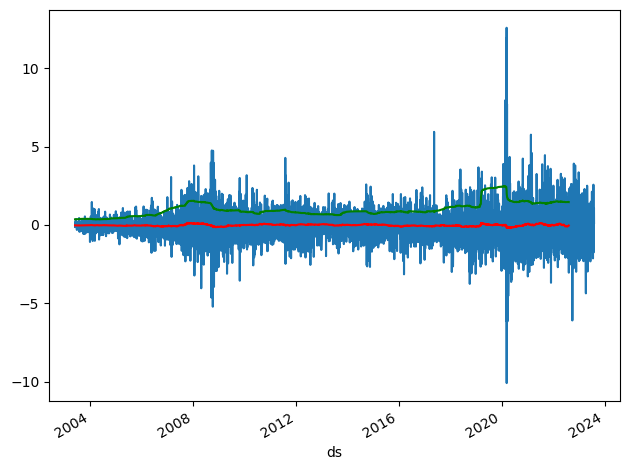

In [21]:
df_diff = df.diff(1)
ma_diff = df_diff.rolling(247).mean()

std_diff = df_diff.rolling(247).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.tight_layout()

X_diff = df_diff.y.dropna().values

result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste estatístico: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

In [22]:
from statsmodels.tsa.stattools import acf, pacf

In [23]:
lag_acf = acf(df_diff.dropna(), nlags=35)
lag_pacf = pacf(df_diff.dropna(), nlags=35)

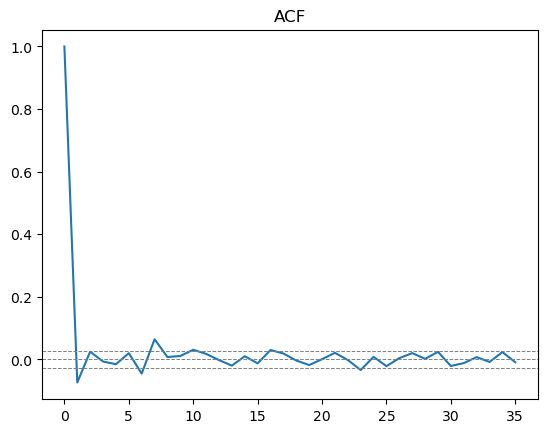

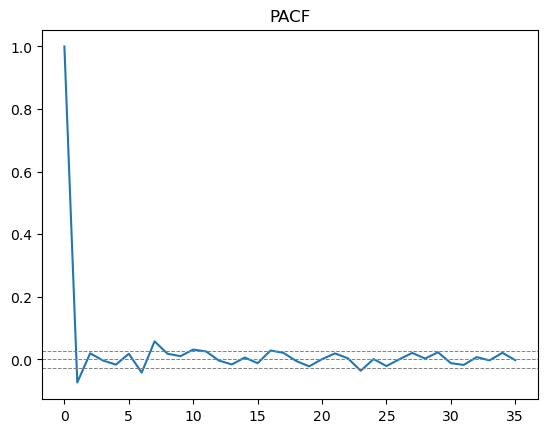

In [24]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(df) - 1), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(df) - 1), linestyle='--', color='gray', linewidth=0.7)

plt.title('ACF')
plt.show()

plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.7)

plt.title('PACF')
plt.show()

In [25]:
# p = 1
# q = 1
# d = 1

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

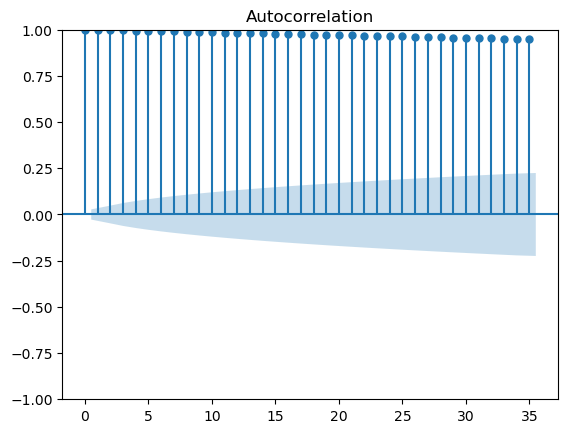

In [27]:
plot_acf(df, lags=35)
plt.show()

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


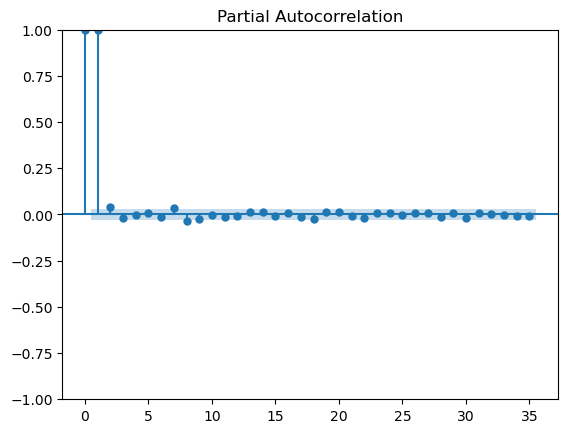

In [28]:
plot_pacf(df, lags=35)
plt.show()

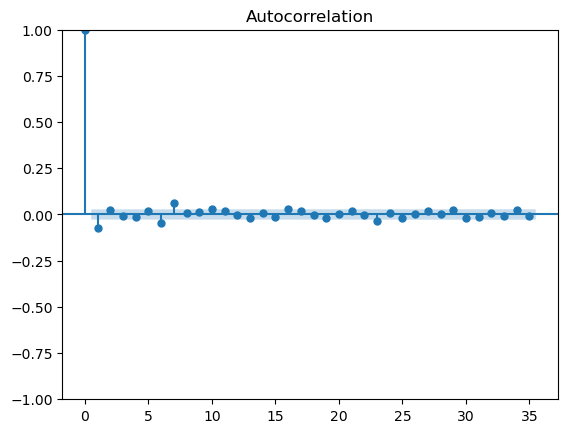

In [29]:
plot_acf(df_diff.dropna(), lags=35)
plt.show()

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


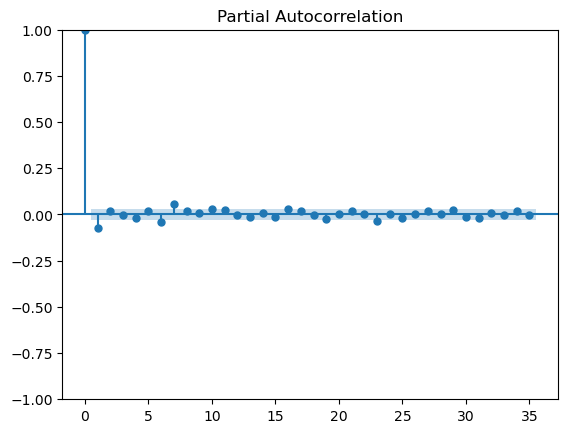

In [30]:
plot_pacf(df_diff.dropna(), lags=35)
plt.show()

In [31]:
# !pip3 install statsforecast

In [32]:
pip show statsforecast

Name: statsforecast
Version: 1.5.0
Summary: Time series forecasting suite using statistical models
Home-page: https://github.com/Nixtla/statsforecast/
Author: Nixtla
Author-email: business@nixtla.io
License: Apache Software License 2.0
Location: C:\Users\joaoa\anaconda3\Lib\site-packages
Requires: fugue, matplotlib, numba, numpy, pandas, plotly, plotly-resampler, scipy, statsmodels, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [33]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA, MSTL, SeasonalExponentialSmoothingOptimized
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\joaoa\anaconda3\Lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [34]:
def calcula_wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [35]:
df = df.reset_index('ds')
df['unique_id'] = 0

In [36]:
df_treino = df[df.ds < '2022-08-07']
df_valid = df[df.ds >= '2022-08-07']
h = len(df_valid['ds'])

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE: 4.84%


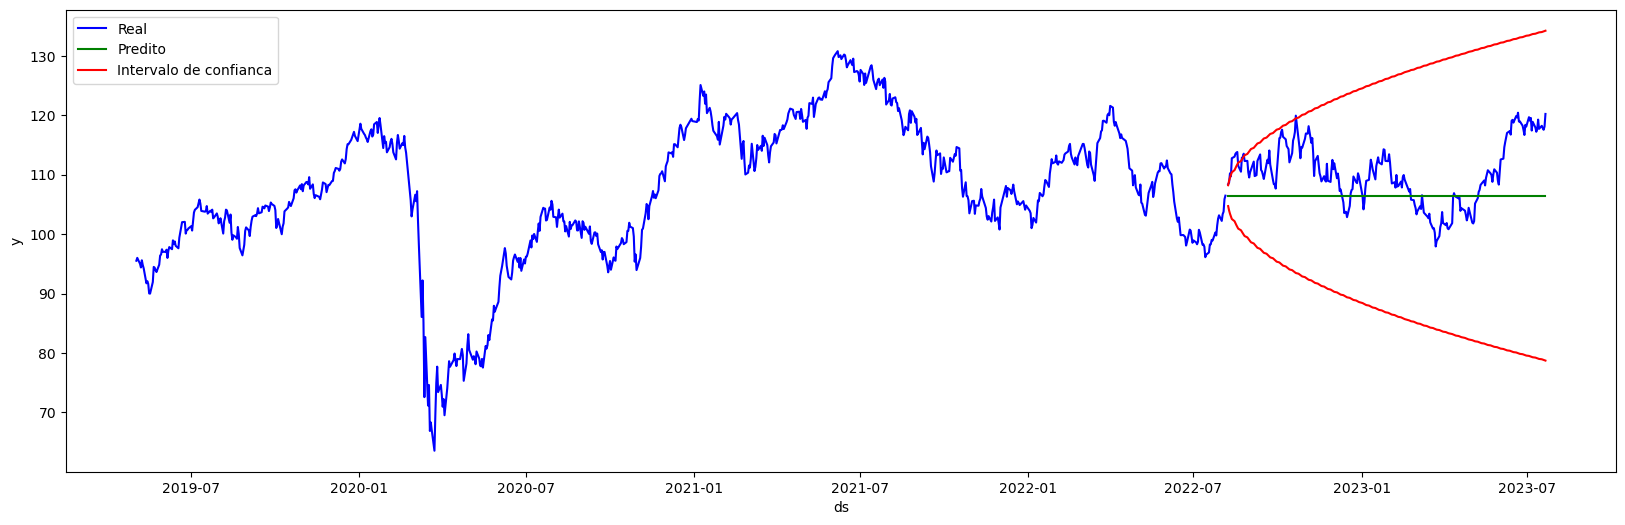

In [37]:
model = StatsForecast(models=[Naive()], freq='B', n_jobs=-1)
model.fit(df_treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(df_valid, on=['ds', 'unique_id'], how='left')
forecast_df = forecast_df.dropna()

wmape = calcula_wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f'WMAPE: {wmape:.2%}')

model.plot(df_treino[df_treino.ds >= '2019-05-01'], forecast_df, level=[90], max_insample_length=90)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_df, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df, x='ds', y='Naive', color='g', label='Predito')
sns.lineplot(data=forecast_df, x='ds', y='Naive-lo-90', color='r', label='Intervalo de confianca')
sns.lineplot(data=forecast_df, x='ds', y='Naive-hi-90', color='r')
plt.legend()
plt.show()

WMAPE: 5.46%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



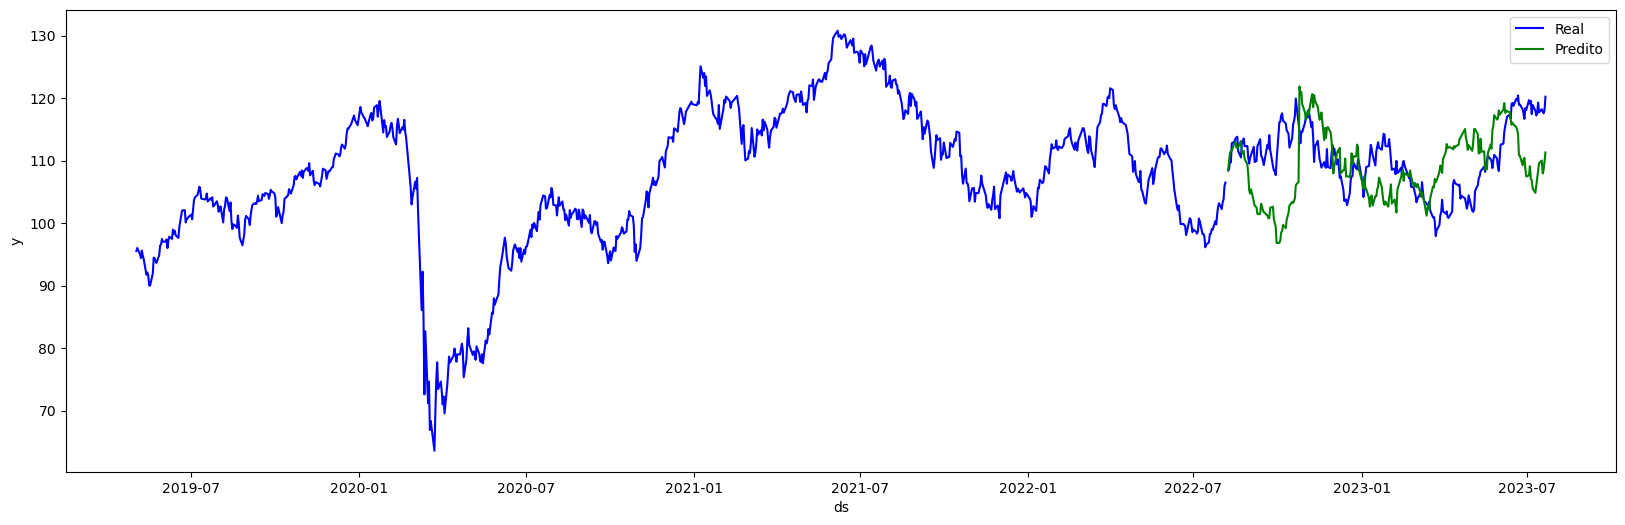

In [39]:
model_se = StatsForecast(models=[SeasonalExponentialSmoothingOptimized(season_length=247)], freq='B', n_jobs=-1)
model_se.fit(df_treino)

forecast_df_se = model_se.predict(h=h, level=[90])
forecast_df_se = forecast_df_se.reset_index().merge(df_valid, on=['ds', 'unique_id'], how='left')
forecast_df_se = forecast_df_se.dropna()

wmape2 = calcula_wmape(forecast_df_se['y'].values, forecast_df_se['SeasESOpt'].values)
print(f'WMAPE: {wmape2:.2%}')

model_se.plot(df_treino, forecast_df_se, level=[90], max_insample_length=90)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_df_se, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df_se, x='ds', y='SeasESOpt', color='g', label='Predito')
plt.legend()
plt.show()

WMAPE: 6.77%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



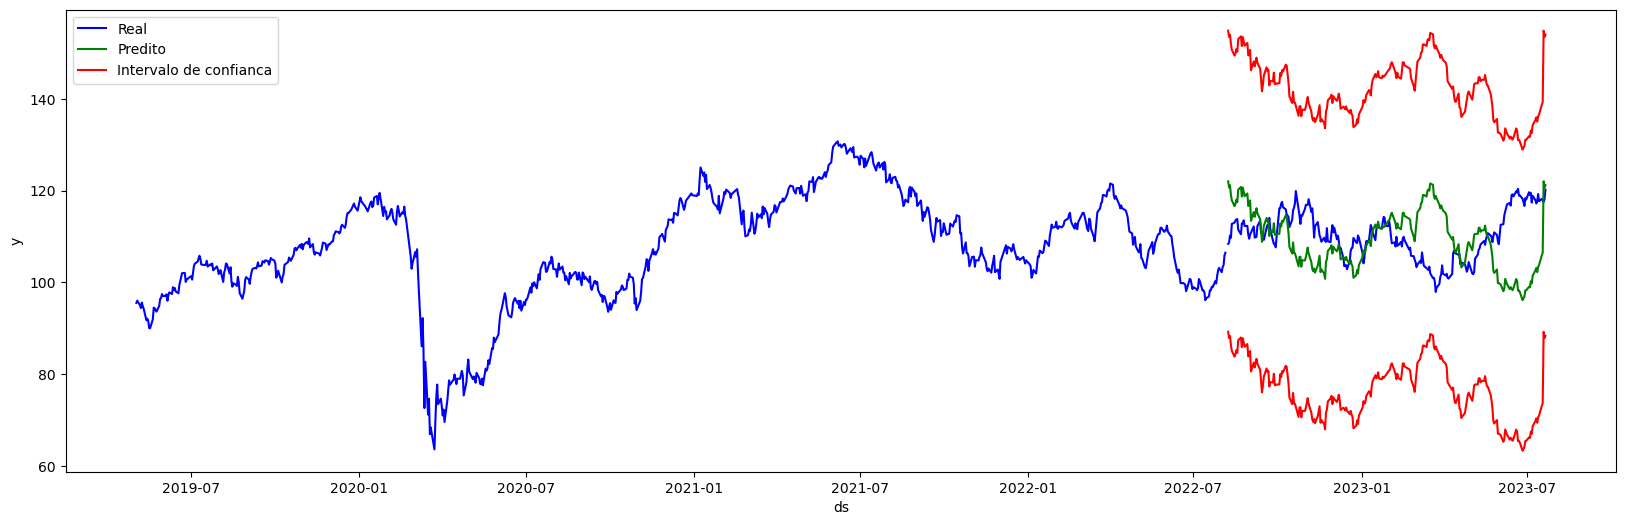

In [40]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=247)], freq='B', n_jobs=-1)
model_s.fit(df_treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(df_valid, on=['ds', 'unique_id'], how='left')
forecast_df_s = forecast_df_s.dropna()

wmape2 = calcula_wmape(forecast_df_s['y'].values, forecast_df_s['SeasonalNaive'].values)
print(f'WMAPE: {wmape2:.2%}')

model_s.plot(df_treino, forecast_df_s, level=[90], max_insample_length=90)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_df_s, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df_s, x='ds', y='SeasonalNaive', color='g', label='Predito')
sns.lineplot(data=forecast_df_s, x='ds', y='SeasonalNaive-lo-90', color='r', label='Intervalo de confianca')
sns.lineplot(data=forecast_df_s, x='ds', y='SeasonalNaive-hi-90', color='r')
plt.legend()
plt.show()

WMAPE: 8.40%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



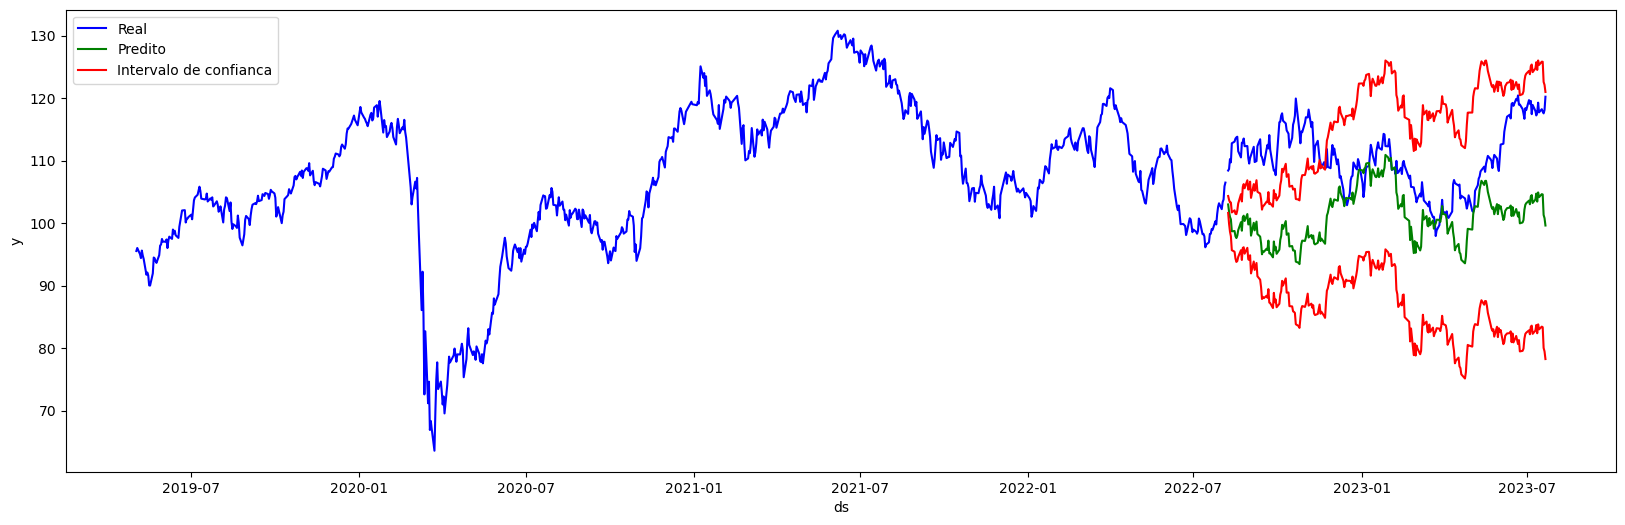

In [41]:
model_s = StatsForecast(models=[MSTL(season_length=[247, 22, 5], trend_forecaster=Naive())], freq='B', n_jobs=-1)
model_s.fit(df_treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(df_valid, on=['ds', 'unique_id'], how='left')
forecast_df_s = forecast_df_s.dropna()

wmape2 = calcula_wmape(forecast_df_s['y'].values, forecast_df_s['MSTL'].values)
print(f'WMAPE: {wmape2:.2%}')

model_s.plot(df_treino[df_treino.ds >= '2019-05-01'], forecast_df_s, level=[90], max_insample_length=90)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_df_s, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL', color='g', label='Predito')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL-lo-90', color='r', label='Intervalo de confianca')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL-hi-90', color='r')
plt.legend()
plt.show()

In [42]:
df_treino = df_treino.reset_index()

In [43]:
df_treino['unique_id'] = 0

In [44]:
# df_treino = df_diff[df_diff.index < '2022-08-07']
# df_valid = df_diff[df_diff.index >= '2022-08-07']
# h = len(df_valid)

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\joaoa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated 

WMAPE: 87.62%


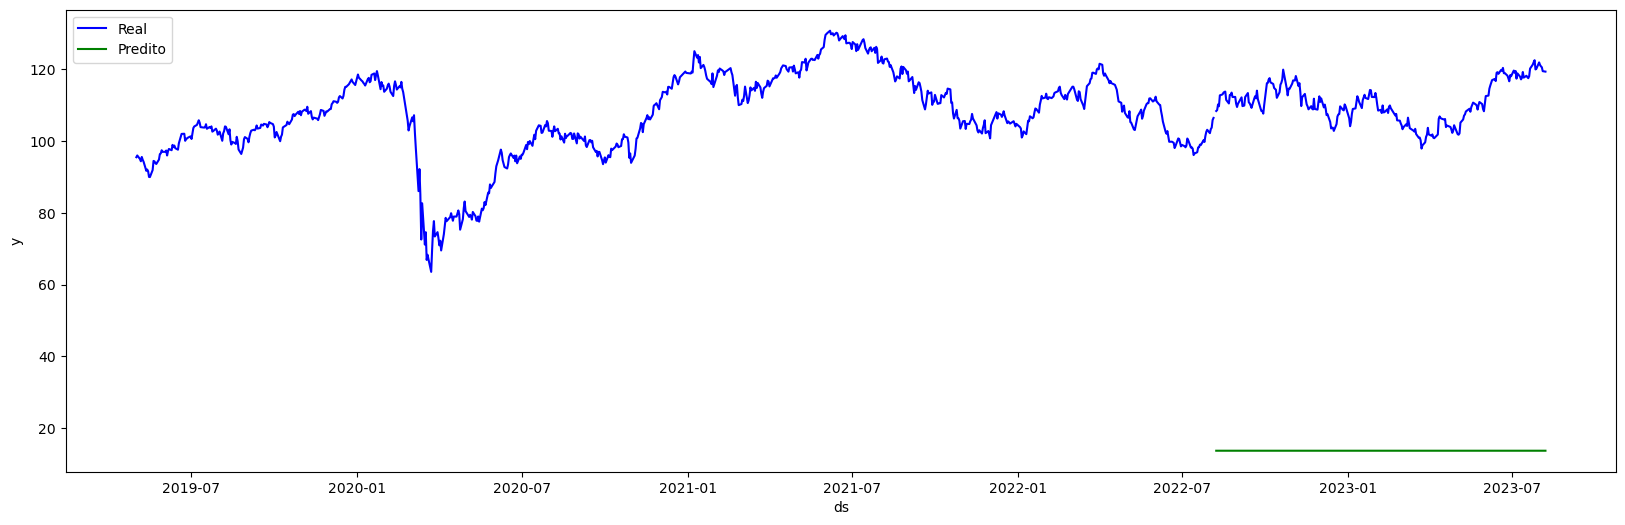

In [45]:
model_arima = ARIMA(df_treino.set_index('ds')['y'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.predict(start=len(df_treino), end=len(df_treino) + len(df_valid) - 1)
forecast_df_a = df_valid.copy()
forecast_df_a['ARIMA'] = forecast_arima.values

wmape = calcula_wmape(forecast_df_a['y'].values, forecast_df_a['ARIMA'].values)
print(f'WMAPE: {wmape:.2%}')

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_df_a, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df_a, x='ds', y='ARIMA', color='g', label='Predito')
plt.legend()
plt.show()

In [46]:
# Prophet

In [47]:
# !pip3 install holidays==0.24
# !pip3 install prophet==1.1.2

In [48]:
from prophet import Prophet

21:11:16 - cmdstanpy - INFO - Chain [1] start processing
21:11:23 - cmdstanpy - INFO - Chain [1] done processing


WMAPE: 9.73%


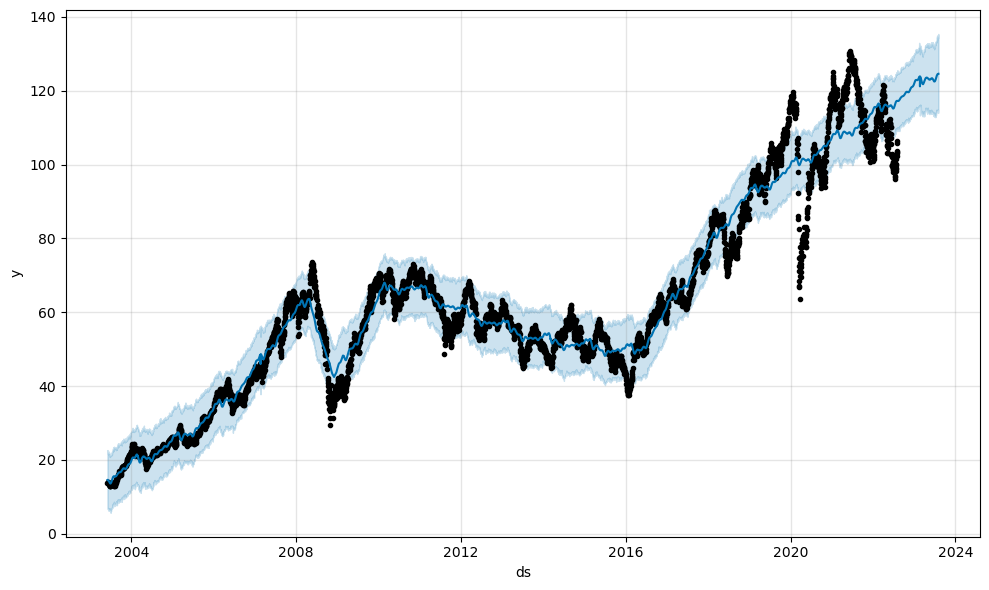

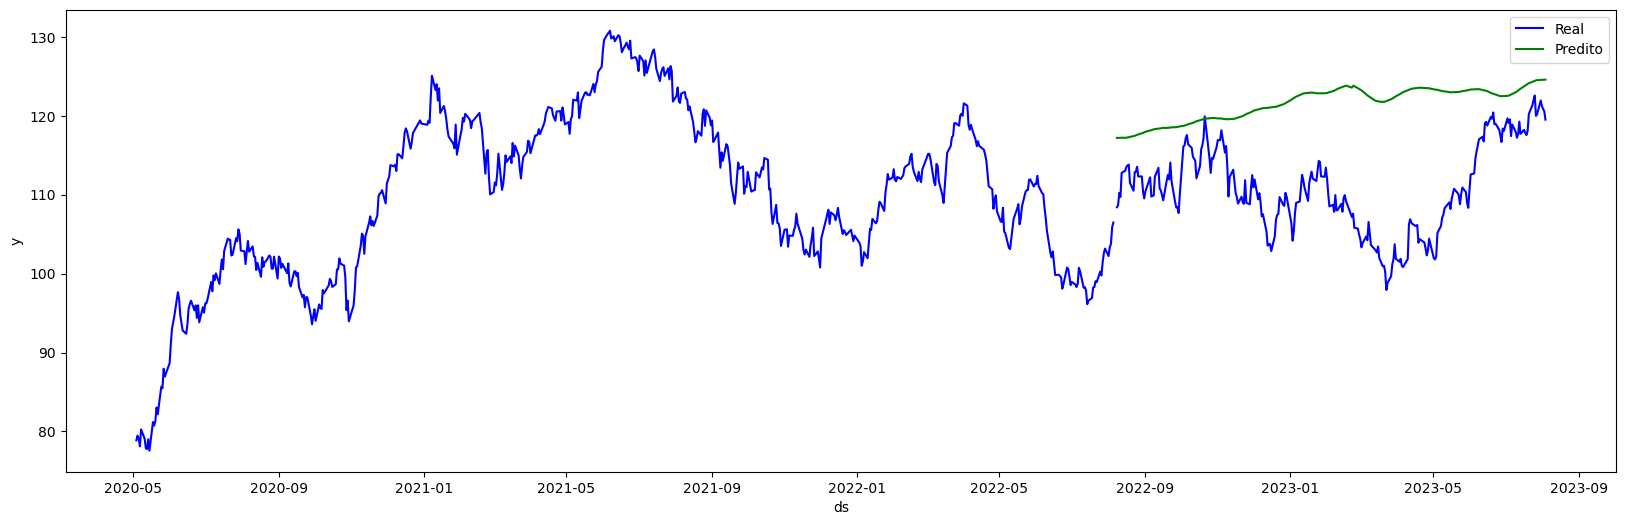

In [49]:
model_p = Prophet(daily_seasonality=True)
model_p.add_country_holidays(country_name='BR')
model_p.fit(df_treino)
future = model_p.make_future_dataframe(periods=365)
future['day'] = future['ds'].dt.weekday
future = future[future['day'] <=4]
forecast_p = model_p.predict(future)

forecast_p_wmape = forecast_p.merge(df_valid, on=['ds'], how='left')
forecast_p_wmape = forecast_p_wmape.dropna()

wmape2 = calcula_wmape(forecast_p_wmape['y'].values, forecast_p_wmape['yhat'].values)
print(f'WMAPE: {wmape2:.2%}')

fig1 = model_p.plot(forecast_p)

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2020-05-01'], x='ds', y='y', color='b', label='Real')
sns.lineplot(data=forecast_p_wmape, x='ds', y='y', color='b')
sns.lineplot(data=forecast_p_wmape, x='ds', y='yhat', color='g', label='Predito')
plt.legend()
plt.show()